# Autoregressive Process - Time Series 

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Simulate AR(2) process 

In [2]:
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])

simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

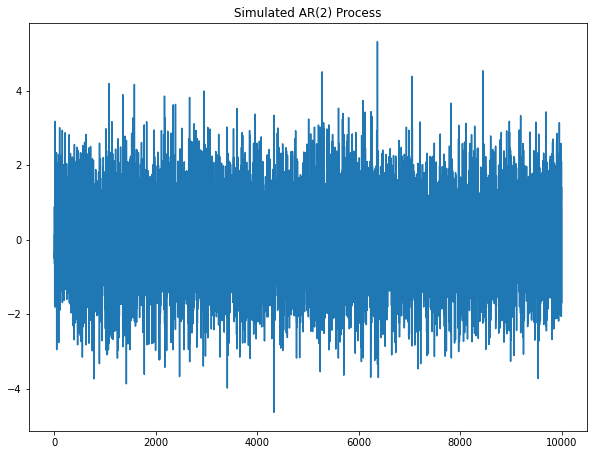

In [3]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

In [4]:
pacf_coef_AR2 = pacf(simulated_AR2_data)
print(pacf_coef_AR2)

[ 1.00000000e+00 -2.18875014e-01 -4.86122824e-01  1.10137268e-02
 -1.24939438e-02 -1.40702356e-02 -5.59697789e-03  3.40084489e-03
  1.03671122e-02  8.56304551e-03 -5.91414363e-03 -1.11154970e-02
 -2.01279061e-02 -8.51705496e-03  5.53189647e-03 -5.09921751e-03
  3.37947692e-03  2.55858941e-02 -2.34499218e-03 -1.47326973e-02
  9.42860898e-03  3.94645665e-04  5.35446577e-03  8.43422917e-03
  5.21493133e-04  3.01655449e-03 -4.73776233e-03  9.35890520e-03
  4.73512381e-03 -6.51736824e-03 -6.84934482e-03 -5.31686109e-05
  9.25729696e-03  4.56871383e-04  1.09987728e-02  1.53870029e-02
 -9.84462743e-03  2.20240877e-02  6.15006740e-03 -1.66767903e-03
 -9.24028046e-03]


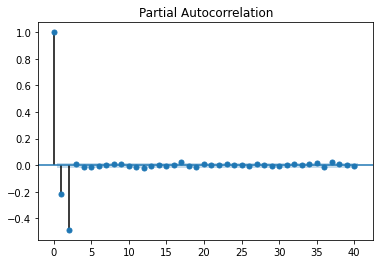

In [5]:
plot_pacf(simulated_AR2_data);

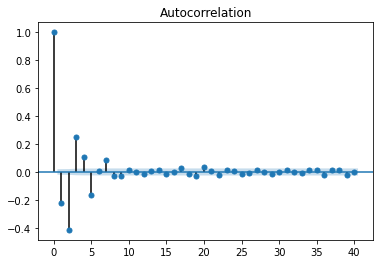

In [6]:
plot_acf(simulated_AR2_data);

In [7]:
rho, sigma = yule_walker(simulated_AR2_data, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.32522028 0.48602071]
sigma: 0.990741726628625


## Simulate AR(3) Process 

In [8]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma = np.array([1])

simulated_AR3_data = ArmaProcess(ar3, ma).generate_sample(nsample=10000)

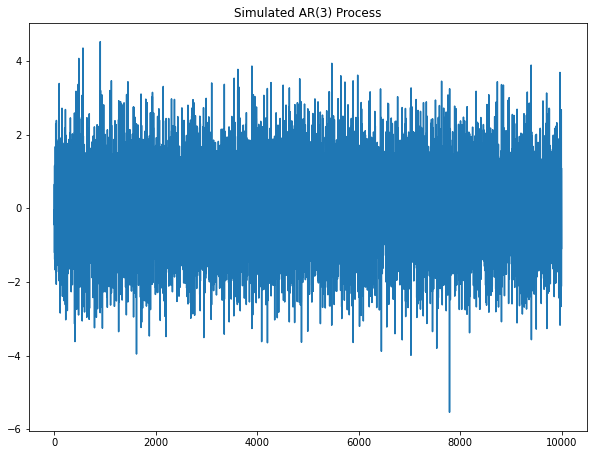

In [9]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR3_data)
plt.title("Simulated AR(3) Process")
plt.show()

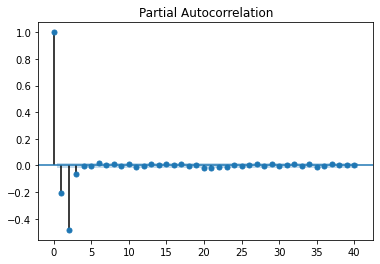

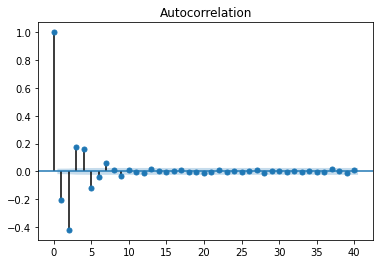

In [10]:
plot_pacf(simulated_AR3_data);
plot_acf(simulated_AR3_data);

In [11]:
rho, sigma = yule_walker(simulated_AR3_data, 3, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.33779294 0.50385558 0.06716275]
sigma: 1.0002359936664298


## Project
### Johnson & Johnson quaterly earning per share modelling

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


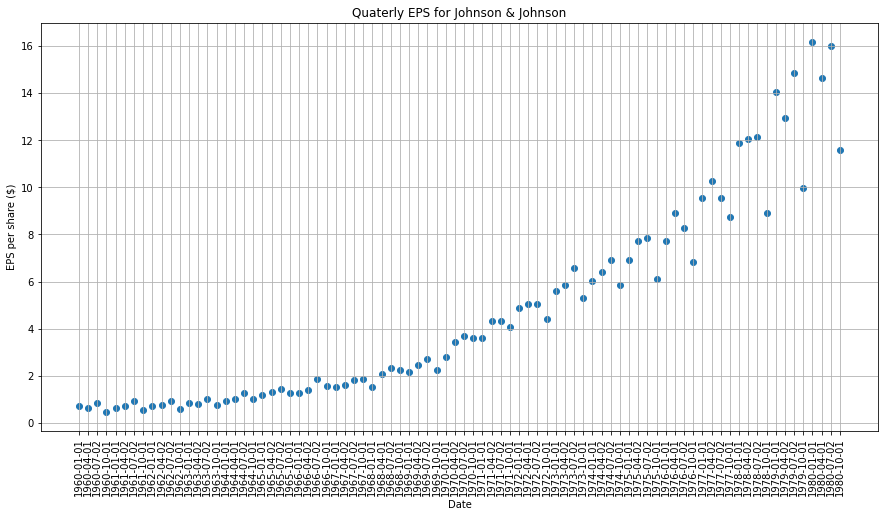

In [14]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [15]:
# Take the log difference to make data stationary

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


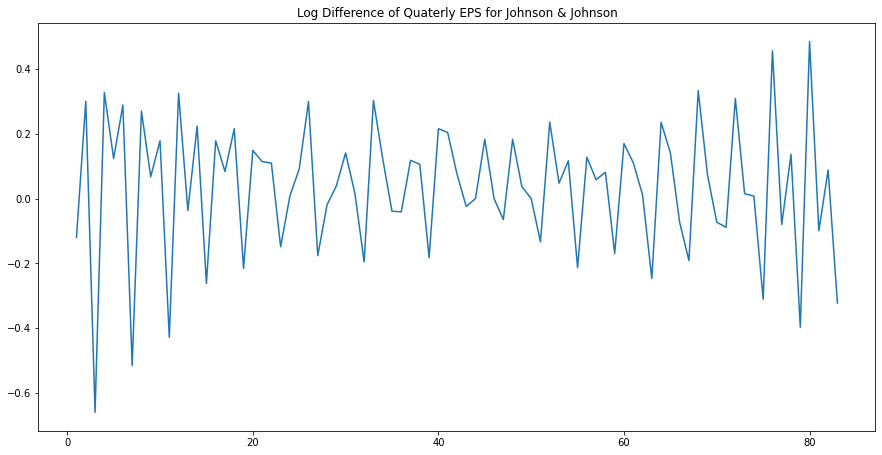

In [16]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quaterly EPS for Johnson & Johnson")
plt.show()

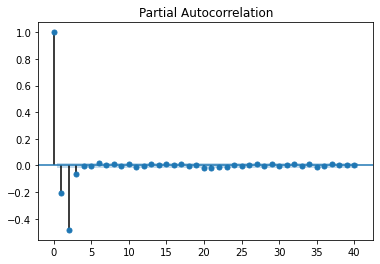

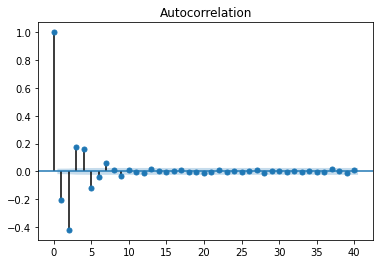

In [17]:
plot_pacf(simulated_AR3_data);
plot_acf(simulated_AR3_data);

In [20]:
# Try a AR(5) model
rho, sigma = yule_walker(data['data'], 5)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.68878493  0.44183118  0.40543803 -0.39895857 -0.18705244]
sigma: 0.1093648131173019
